# Quality Analysis of Cell Data

In [1]:
!pip install hana_ml
!pip install hdfs

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Import of HANA Connections
# Enables to create a pandas DataFrame out of HANA table selections
# Details: https://help.sap.com/doc/1d0ebfe5e8dd44d09606814d83308d4b/2.0.04/en-US/hana_ml.html
#import hana_ml
#import hana_ml.dataframe as dataframe
#from notebook_hana_connector.notebook_hana_connector import NotebookConnectionContext
#import hdfs

# Usual packages for data science
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Connection to Data Source
 * Open the connection to the HANA DB using the credentials stored in the Connection Management.
 * Read the table into DataFrame df
 * Display the DataFrame

In [3]:
#FOR HANA ML
#conn = NotebookConnectionContext(connectionId = 'HANA_CLOUD_TECHED')
#df = conn.table('CELLSTATUS', schema='TECHED').collect()
df = pd.read_csv("/Users/Shared/data/IoTquality/cellstatus.csv")
display(df)

,DATE,CELLID,NOM_KEY1,KEY1,NOM_KEY2,KEY2
0,2020-10-01,1234512,93.5,93.346178,193.0,195.586165
1,2020-10-01,1345331,96.2,94.598702,209.4,202.841288
2,2020-10-01,4139991,109.6,109.940660,159.5,167.919984
3,2020-10-01,4543213,77.8,76.139900,213.4,211.240157
4,2020-10-01,7148927,128.6,130.255389,182.2,188.854179
...,...,...,...,...,...,...
361,2020-11-30,1345331,87.9,89.773541,221.8,294.178045
362,2020-11-30,4139991,101.0,97.948879,211.5,221.972107
363,2020-11-30,4543213,77.4,78.897707,235.9,227.397748
364,2020-11-30,7148927,103.2,101.149750,203.2,203.520831


## Configuration Setting and Performance over Time

Creating 2 charts for the values of "KEY1" and "KEY2" over time. Comparing measured performance values against configuration setting. 

Text(0.5, 1.0, 'KEY2')

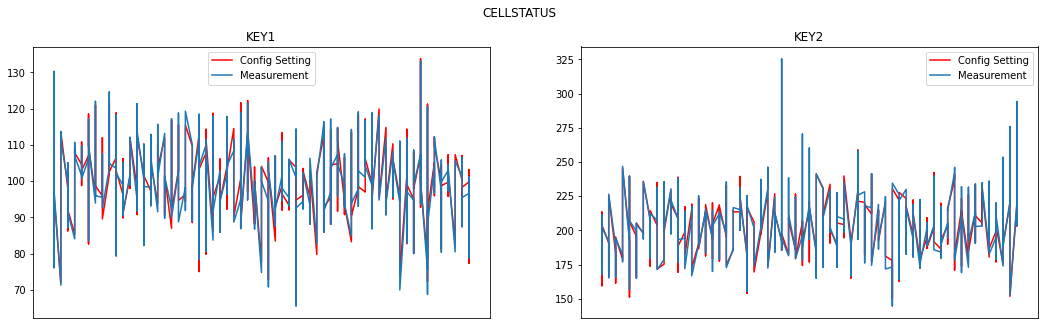

In [4]:
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(1, 2,1)
ax2 = fig.add_subplot(1, 2,2)

fig.suptitle('CELLSTATUS',y = 0.99)

ax1.plot(df['DATE'],df['NOM_KEY1'],color='red')
ax1.plot(df['DATE'],df['KEY1'])
ax1.legend(['Config Setting', 'Measurement'])
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
ax1.set_title('KEY1')


ax2.plot(df['DATE'],df['NOM_KEY2'],color='red')
ax2.plot(df['DATE'],df['KEY2'])
ax2.legend(['Config Setting', 'Measurement'])
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
ax2.set_title('KEY2')

## Histogram of KEY1 and KEY2
Calculation the value distribution of the values of "KEY1" and "KEY2". 

(array([ 1.,  0.,  2.,  1.,  0.,  5.,  7., 11., 10., 16., 20., 19., 25.,
        27., 18., 20., 29., 19., 24., 29., 19.,  9., 15., 11.,  5.,  9.,
         4.,  1.,  3.,  0.,  1.,  2.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([144.78296385, 148.39475572, 152.00654759, 155.61833947,
        159.23013134, 162.84192322, 166.45371509, 170.06550697,
        173.67729884, 177.28909072, 180.90088259, 184.51267447,
        188.12446634, 191.73625822, 195.34805009, 198.95984197,
        202.57163384, 206.18342571, 209.79521759, 213.40700946,
        217.01880134, 220.63059321, 224.24238509, 227.85417696,
        231.46596884, 235.07776071, 238.68955259, 242.30134446,
        245.91313634, 249.52492821, 253.13672009, 256.74851196,
        260.36030384, 263.97209571, 267.58388758, 271.19567946,
        274.80747133, 278.41926321, 282.03105508, 285.64284696,
        289.25463883, 292.86643071, 296.47822258, 300.09001446,
        303.

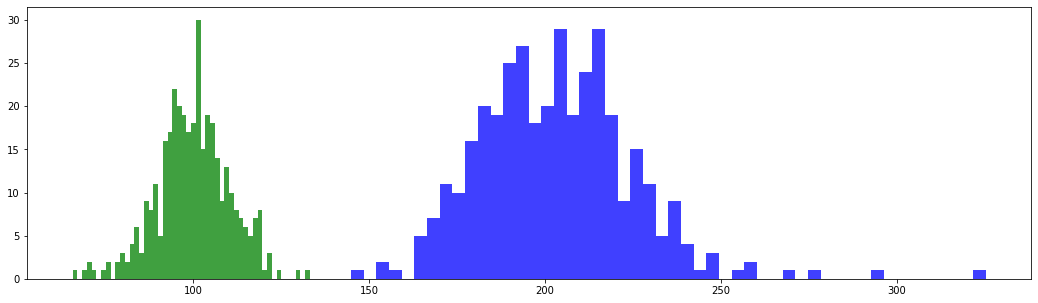

In [5]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.hist(df['KEY1'],50, facecolor='green', alpha=0.75)
ax.hist(df['KEY2'],50, facecolor='blue', alpha=0.75)

## Statistic Description
Assumption of a normal distribution. 3-sigma-score: 99.73% should be within +-3*std from mean value. 

1. Calculate mean value and standard deviation
2. Compute the number of values outside of the 3-sigma area compared to the expected outcome

### KEY1 for all Cells

In [6]:
# KEY1 for all Cells
mean = df['KEY1'].mean()
std = df['KEY1'].std()
print('Statistics:\n\tav: {}\n\tsd: {}'.format(mean,std))
exl_3s = df.loc[ (df.KEY1 < mean - 3*std) | (df.KEY1 > mean + 3*std),'KEY1'].count() 
print('Z3-score: \n\tactual #values: {}\n\ttarget #values: {}'.format(exl_3s,round(0.0027*df.shape[0])))

Statistics:
	av: 99.97261662172998
	sd: 10.399944708434907
Z3-score: 
	actual #values: 2
	target #values: 1


### KEY2 for all Cells

In [7]:
mean2 = df['KEY2'].mean()
std2 = df['KEY2'].std()
print('Statistics:\n\tav: {}\n\tsd: {}'.format(mean2,std2))
exl_3s = df.loc[ (df.KEY2 < mean2 - 3*std2) | (df.KEY2 > mean2 + 3*std2),'KEY2'].count() 
print('Z3-score: \n\tactual #values: {}\n\ttarget #values: {}'.format(exl_3s,round(0.0027*df.shape[0])))

Statistics:
	av: 203.1019348594501
	sd: 21.889452721885455
Z3-score: 
	actual #values: 4
	target #values: 1


###  For Each Cell of KEY2
Deviation of actual number of values outside of 3-sigma boundaries compared to the expected one for each cell. 

In [8]:
cells = df.CELLID.unique()
for c in cells: 
    dfc = df.loc[df.CELLID == c]
    exl_3s = df.loc[(df.CELLID == c) & ((df.KEY2 < mean2 - 3*std2) | (df.KEY2 > mean2 + 3*std2)),'KEY2'].count() 
    print('Z3-score {}: \n\tactual #values: {}\n\ttarget #values: {}'.format(c,exl_3s,round(0.0027*dfc.shape[0])))

Z3-score 1234512: 
	actual #values: 0
	target #values: 0
Z3-score 1345331: 
	actual #values: 4
	target #values: 0
Z3-score 4139991: 
	actual #values: 0
	target #values: 0
Z3-score 4543213: 
	actual #values: 0
	target #values: 0
Z3-score 7148927: 
	actual #values: 0
	target #values: 0
Z3-score 9874382: 
	actual #values: 0
	target #values: 0


### Detailed look on the outliers
For cells where the expected values deviate check the time dependency. 

In [9]:
c = 1345331
dfc = df.loc[(df.CELLID == c) & ((df.KEY2 < mean2 - 3*std2) | (df.KEY2 > mean2 + 3*std2))]
display(dfc)

,DATE,CELLID,NOM_KEY1,KEY1,NOM_KEY2,KEY2
157,2020-10-27,1345331,91.1,92.340991,190.7,325.372558
175,2020-10-30,1345331,103.9,100.060520,174.4,270.432120
355,2020-11-29,1345331,107.0,106.438773,218.1,275.933750
361,2020-11-30,1345331,87.9,89.773541,221.8,294.178045


## Access Data on DI Data Lake

In [ ]:
client = InsecureClient('http://datalake:50070')
with client.read('/shared/Teched2020/performance.csv', encoding='utf-8') as reader:
   df_p = pd.read_csv(reader)
display(df_p)